FATMA BETÜL FİŞNE
040200204
PREDICTION OF THE PROPORTION OF WOMEN IN MANAGEMENT POSITIONS IN UPCOMING YEARS

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
import seaborn as sns

LOAD, SPLIT AND PREPROCESS

In [47]:
df = pd.read_excel(r"Women_in_management_percentages.xlsx")         # Loading the dataset

unique_countries = df['Country'].nunique()                                      #number of countries in the dataset
print(f'The dataset includes data for {unique_countries} unique countries.')

X = df[['Country', 'Year']]         #features
y = df['Percentage_of_Women']       #output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #splitting to train and test data

preprocessor = ColumnTransformer(
    transformers=[
        ('country', OneHotEncoder(), ['Country'])           # Categorical feature is converted to numerical value using OneHotEncoder
    ],
    remainder='passthrough'
)

The dataset includes data for 128 unique countries.


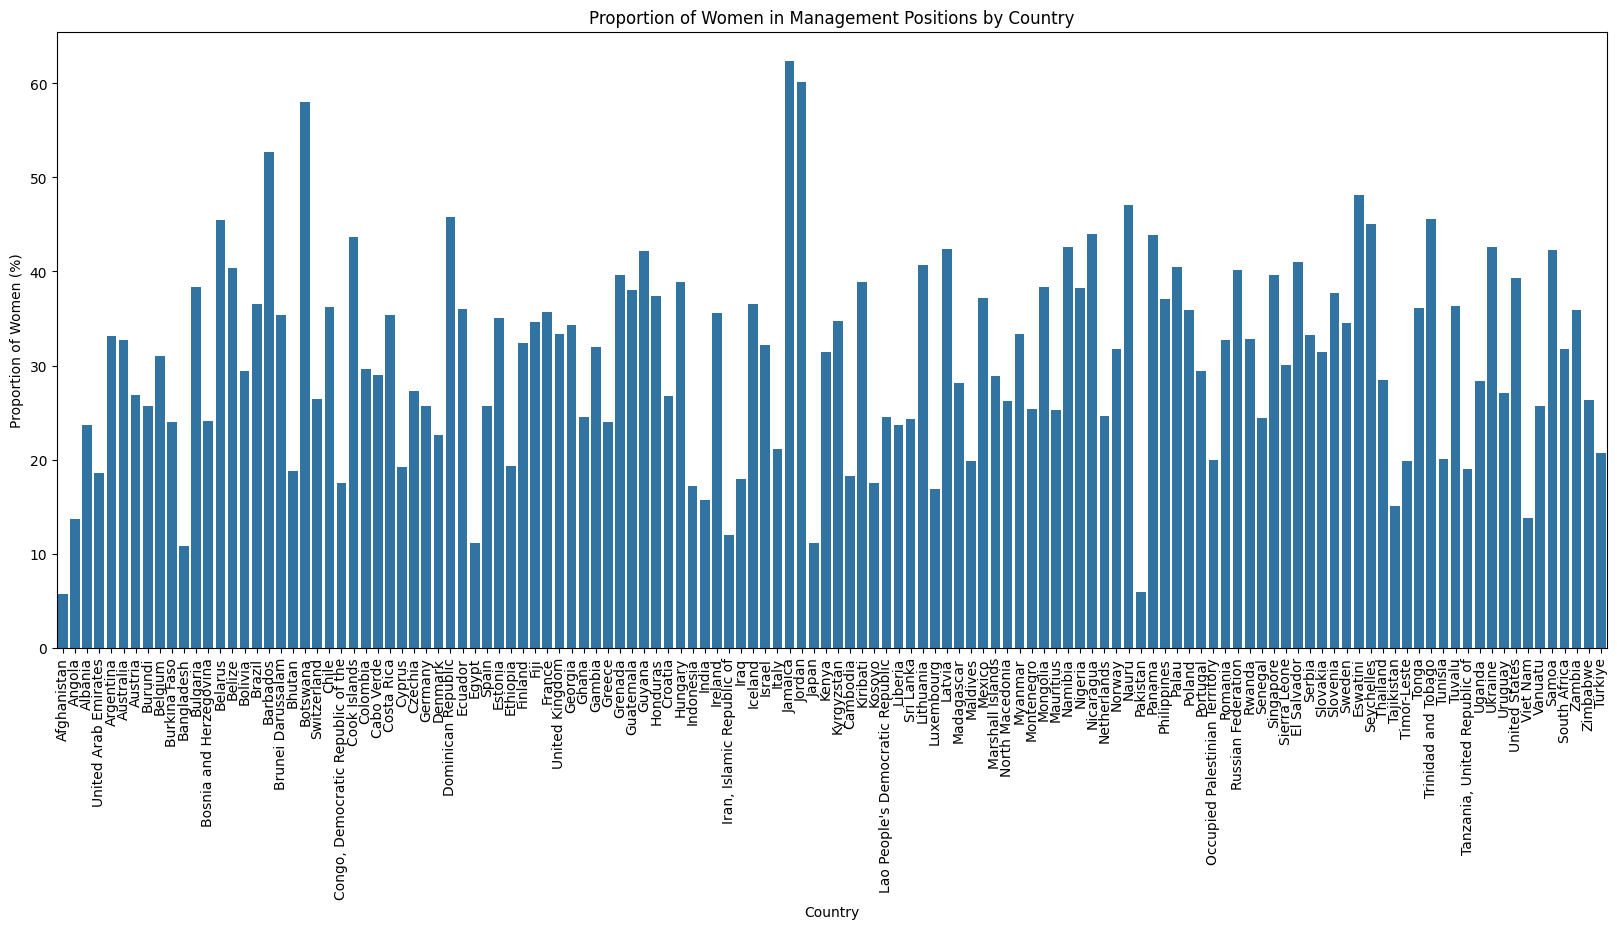

In [90]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Country', y='Percentage_of_Women', data=df, errorbar=None)
plt.title('Proportion of Women in Management Positions by Country')
plt.xlabel('Country')
plt.ylabel('Proportion of Women (%)')
plt.xticks(rotation=90)
plt.show()

LINEAR REGRESSION MODEL

In [89]:
model = LinearRegression()

pipeline = Pipeline([
    ('preprocessor', preprocessor),         # pipeline to preprocessing and modeling
    ('model', model)
])

pipeline.fit(X_train, y_train)              #traiining the model

predictions = pipeline.predict(X_test)      #making predictions on test data to calculate error

mse = mean_squared_error(y_test, predictions)       #error of the model
print(f'Mean Squared Error: {mse}')

new_data = pd.DataFrame({'Country': ['Türkiye'], 'Year': [2023]})   #making predictions on new data
new_prediction = pipeline.predict(new_data)
print(f'Predicted Percentage of Women: {new_prediction[0]}')

Mean Squared Error: 26.111614796178603
Predicted Percentage of Women: 21.31117380515036


POLYNOMIAL REGRESSION MODEL

In [88]:
degree = 2  # degree of polynomial
model = make_pipeline(preprocessor, PolynomialFeatures(degree), LinearRegression())

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

new_data = pd.DataFrame({'Country': ['Türkiye'], 'Year': [2023]})
new_prediction = model.predict(new_data)
print(f'Predicted Percentage of Women: {new_prediction[0]}')

Mean Squared Error: 26.146144385962696
Predicted Percentage of Women: 21.301595065804406


DECISION TREE REGRESSION MODEL

In [87]:
model = DecisionTreeRegressor(random_state=37)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

new_data = pd.DataFrame({'Country': ['Türkiye'], 'Year': [2023]})
new_prediction = pipeline.predict(new_data)
print(f'Predicted Percentage of Women: {new_prediction[0]}')

Mean Squared Error: 34.06838442140468
Predicted Percentage of Women: 20.7


RANDOM FOREST REGRESSION MODEL

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=25)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

#predictions
new_data = pd.DataFrame({'Country': ['Türkiye'], 'Year': [2023]})
new_prediction = pipeline.predict(new_data)
print(f'Predicted Percentage of Women: {new_prediction[0]}')

Mean Squared Error: 25.59477362690601
Predicted Percentage of Women: 21.754900000000017


XGB REGRESSION MODEL (MAIN MODEL, HAS THE LEAST ERROR)

In [85]:
model = XGBRegressor(objective='reg:squarederror', random_state=35)

pipeline = Pipeline([
    ('preprocessor', preprocessor),            # pipeline to combine preprocessing and modeling  
    ('model', model)
])

pipeline.fit(X_train, y_train)              #training the model

predictions = pipeline.predict(X_test)      #predictions on test data to calculate error

mse = mean_squared_error(y_test, predictions)   #error calculation
print(f'Mean Squared Error: {mse}')

#predictions on new data
new_data = pd.DataFrame({'Country': ['Türkiye'], 'Year': [2023]})
new_prediction = pipeline.predict(new_data)
print(f'Predicted Percentage of Women: {new_prediction[0]}')

Mean Squared Error: 23.497950791419818
Predicted Percentage of Women: 23.095542907714844


LASSO REGRESSION MODEL

In [84]:
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', Lasso(alpha=1.0))  
])

lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Mean Squared Error: {lasso_mse}')

new_data = pd.DataFrame({'Country': ['Türkiye'], 'Year': [2023]})
lasso_new_prediction = lasso_model.predict(new_data)
print(f'Lasso Predicted Percentage of Women: {lasso_new_prediction[0]}')


Lasso Mean Squared Error: 64.91371611522614
Lasso Predicted Percentage of Women: 32.74055756888009


RIDGE REGRESSION MODEL

In [83]:
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', Ridge(alpha=1.0))  
])

ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Mean Squared Error: {ridge_mse}')

new_data = pd.DataFrame({'Country': ['Finland'], 'Year': [2025]})
ridge_new_prediction = ridge_model.predict(new_data)
print(f'Ridge Predicted Percentage of Women: {ridge_new_prediction[0]}')



Ridge Mean Squared Error: 26.105999329860094
Ridge Predicted Percentage of Women: 37.22244115573767
